In [10]:
import os
import math

import math
import numpy as np
import scipy as sp
import pandas as pd

from analysis import isovisc, utilities, common
reader = isovisc.data.reader
from everest.h5anchor import Fetch, Scope
from everest.window import Canvas, plot, raster, DataChannel as Channel, get_cmap
%matplotlib inline

In [79]:
inputs, initials, finals, averages = isovisc.data.get_summary_frames()
initialrasters, finalrasters = isovisc.data.get_rasters()

In [3]:
finals.columns

Index(['Nu', 'Nu_freq', 'Nu_min', 'Nu_range', 'VRMS', 'psi_av', 'psi_min',
       'psi_range', 'strainRate_outer_av', 'strainRate_outer_min',
       'strainRate_outer_range', 'stressAng_outer_av', 'stressAng_outer_min',
       'stressAng_outer_range', 'stressRad_outer_av', 'stressRad_outer_min',
       'stressRad_outer_range', 'temp_av', 'temp_min', 'temp_range',
       'theta_av', 'theta_min', 'theta_range', 'velAng_outer_av',
       'velAng_outer_min', 'velAng_outer_range', 'velMag_range'],
      dtype='object')

In [8]:
inputs

,H,alpha,aspect,f,res,temperatureField
hashID,,,,,,
gleepsoiqio-rhuistsaist,10.000,4.8,1.0,0.90,28.0,_built_weykruizh-utrsmiuw
eewriieezoe-aaspaingub,0.056,4.9,1.0,0.75,16.0,_built_heuswdwei-todwliut
iicuigluob-hiabiufue,0.010,4.7,1.0,1.00,24.0,_built_oongaeijia-droobldwusl
thiraugee-eutzaeoeklui,5.623,7.0,1.0,0.95,64.0,_built_liewrskiiv-auyotreuj
eduokwiz-sluizkraubr,3.162,2.7,1.0,0.60,8.0,_built_twogphuw-zeetrdruesw
...,...,...,...,...,...,...
joaqiamoe-eoskaoaobla,0.178,5.0,1.0,0.90,32.0,_built_sheojloegl-euzoiisfio
nuaklqeusm-deahneeg,0.178,6.5,1.0,0.65,48.0,_built_jiusmvaim-naiqaudio
gruareuskiu-psoigshidr,0.562,5.1,1.0,0.80,16.0,_built_kriikrkioph-efraizouts


In [108]:
def linear2_fineres(alphaexp):
    return max(8, round(2 ** alphaexp / 4) * 4)

In [132]:
inputs['alpha']

hashID
gleepsoiqio-rhuistsaist    4.8
eewriieezoe-aaspaingub     4.9
iicuigluob-hiabiufue       4.7
thiraugee-eutzaeoeklui     7.0
eduokwiz-sluizkraubr       2.7
                          ... 
joaqiamoe-eoskaoaobla      5.0
nuaklqeusm-deahneeg        6.5
gruareuskiu-psoigshidr     5.1
slougzaosp-psoecuaklae     3.0
triqboarh-eghuuosmoe       3.1
Name: alpha, Length: 8984, dtype: float64

In [128]:
sel = inputs.loc[inputs['res'] == inputs['alpha'].apply(linear2_fineres)].index

/home/morpheus/workspace/mount/resources/everest/everest/window/canvas.py:91: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  self.fig.tight_layout()


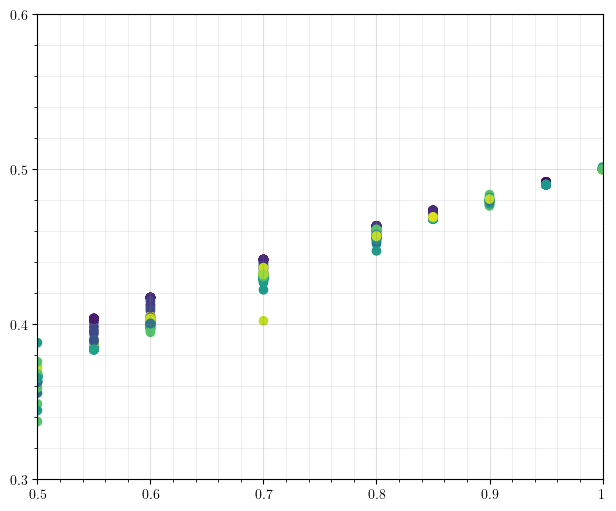

In [133]:
sel = inputs.loc[sel].loc[inputs['H'] == 0].index
plot.scatter(
    inputs.loc[sel]['f'],
    averages.loc[sel]['temp_av'],
    c = inputs.loc[sel]['alpha'],
    size = (6, 5)
    )

In [85]:
inputs.loc[sel].index[0]

'froadwtseosn-jeudueswo'

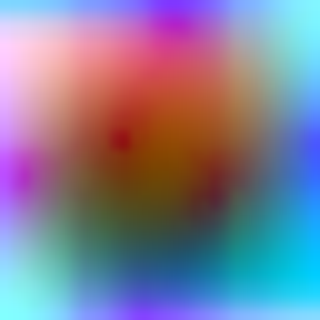

In [107]:
im = finalrasters[inputs.loc[sel].index[16]]
im.resize((10*d for d in im.size))

In [11]:
0.5 * 0.5 ** (1. / math.e)

0.38746034225497533

In [12]:
0.5 / (0.5 + 1)

0.3333333333333333

In [18]:
def rprime(h, f):
    return h * (1 - f) + f

In [20]:
for f in [v / 10 for v in range(10)]:
    print(rprime(1, f), rprime(0, f))

1.0 0.0
1.0 0.1
1.0 0.2
1.0 0.3
1.0 0.4
1.0 0.5
1.0 0.6
1.0 0.7
1.0 0.8
1.0 0.9


In [21]:
15**2

225

In [22]:
27 ** (1/3)

3.0

In [23]:
4 ** (1/4)

1.4142135623730951

In [60]:
def tcell(f):
    return f / (f + 1)
def D_nought(f):
    return 3. / math.sqrt(2) * (math.pi / tcell(f))**(1/3)
def Nu_cond(f):
    return (1 - f) / math.log(f)

In [61]:
D_nought(1)

3.914409105681903

In [62]:
1 / D_nought(1)

0.25546639939817856

In [63]:
1 / D_nought(0.5)

0.2231704559107698

In [64]:
1 / D_nought(0.000001)

0.0032186738685352307

In [65]:
1/(1+0.5**(-3/4))

0.3728848808245891

In [76]:
1/(1+0.7**(-3/4))

0.43351941948032385

In [77]:
0.7/(0.7+1)

0.4117647058823529